## 1. 설정

In [1]:
import sys
assert sys.version_info>=(3,5)

import sklearn
assert sklearn.__version__>= "0.20"

import numpy as np
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=4)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR="."
CHAPTER_ID="end_to_end_project"
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png",resolution=300):
    path=os.path.join(IMAGES_PATH,fig_id+"."+fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)

## 2. 데이터 다운로드
- 웹 브라우저를 사용해 이 파일을 내려받고 tar xzf housing.tgz 명령을 실행해 압축을 풀어 CSV 파일을 얻을 수 있음
- 하지만 간단한 함수를 준비하면 특히 데이터가 정기적으로 바뀌는 경우에 유용

1. fetch_housing_data()를 호출하면 현재 작업공간에 datasets/housing 디렉터리를 만들고 housing.tgz 파일을 내려받고 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만든다.

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH=os.path.join("datasets","housing")
HOUSING_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

2. 판다스를 사용해 데이터를 읽어들이는 함수를 만든다.
- 모든 데이터를 담은 판다스의 데이터프레임 객체를 반환한다.

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

## 3. 데이터 구조 훑어보기

1. head() 메서드
- 처음 다섯 행을 확인한다.

In [5]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- 각 행은 하나의 구역을 나타낸다.
- 특성은 longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ecean_proximity 등 10개이다.

2. info() 메서드
- 데이터에 대한 간략한 설명과 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인한다.

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 총 20640 개의 샘플이 들어있다.
- total_bedrooms 특성은 20433개만 널 값이 아니다. -> 207개의 구역은 이 특성을 가지고 있지 않다.
- ocean_proximity 는 object 객체이고 head() 함수를 통해 알 수 있듯이 같은 값이 반복 -> 범주형일 것 예측

3. value_counts() 메서드
- 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지를 알 수 있다.

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

4. describe() 메서드
- 숫자형 특성의 요약 정보를 보여준다.

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


5. hist() 메서드
- 전체 데이터셋에서 모든 숫자형 특성에 대한 히스토그램 출력

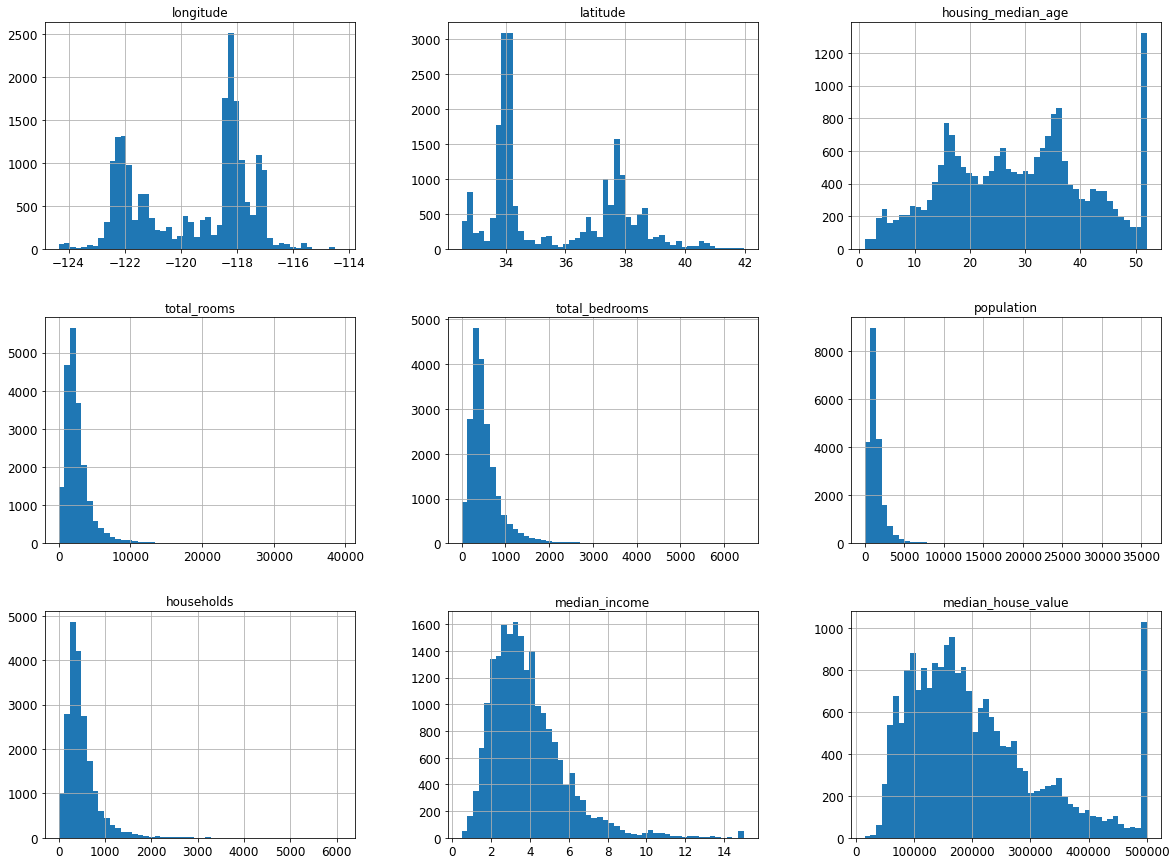

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

- median_income 특성이 US 달러로 표현되어 있지 않은 것 같다. (1= 약 10000달러)
- housing_median_age와 median_house_value (레이블) 역시 최댓값, 최솟값을 한정했다. (한곗값 밖의 구역에 대한 정확한 레이블을 구한다. or 훈련 세트에서 이러한 구역을 제거)
- 특성들의 스케일이 서로 많이 다르다.
- 많은 히스토그램의 꼬리가 두껍다. -> 모양 변형

### 4. 테스트 세트 만들기
- 만약 테스트 세트를 들여다 본다면 테스트 세트에서 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될 수도 있다. (데이터 스누핑 편향)

1. 무작위 샘플링 방식
- 예시로 만든 것. 실전에서는 sklearn의 train_test_split() 사용!

In [10]:
import numpy as np
np.random.seed(42)

def split_train_test(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set,test_set=split_train_test(housing,0.2)
len(train_set)

16512

In [12]:
len(test_set)

4128

- 데이터셋을 업데이트한 후에도 안정적인 훈련/테스트 분할을 위한 해결책 ->샘플의 식별자를 사용해 테스트 세트로 보낼지 말지 결정
- (ex) 각 샘플마다 식별자의 해시값을 계산해 해시 최댓값의 20%보다 작거나 같은 샘플만 테스트 세트로 보내기 -> 이전 훈련 세트에 있던 샘플을 포함하지 않는다.

In [13]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xfffffffff<test_ratio*2**32

def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
import hashlib
def test_set_check(identifier, test_ratio, has=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

In [15]:
def test_set_check(identifier,test_ratio,has=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1]<256*test_ratio

In [16]:
housing_with_id=housing.reset_index()
train_set, test_set=split_train_test_by_id(housing_with_id,0.2,"index")

AttributeError: 'int' object has no attribute 'digest'

사이킷런의 train_test_split()

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


2. 계층적 샘플링
- 전체 표본은 계층이라는 동질의 그룹으로 나뉘고, 테스트 세트가 전체 인구를 대표하도록 각 계층에서 올바른 수의 샘플을 추출

(if) 중간 소득이 중간 주택 가격을 예측하는데 매우 중요하다고 이야기해줬다고 가정
- 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 한다.
- 중간 소득이 연속적인 숫자형 특성 -> 소득에 대한 카테고리 특성 필요

<AxesSubplot:>

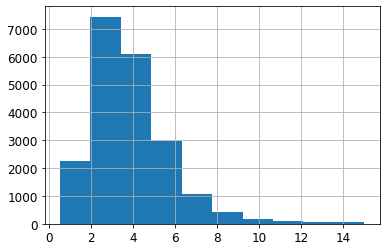

In [19]:
housing["median_income"].hist()

In [20]:
housing["income_cat"]=pd.cut(housing["median_income"],
                            bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1,2,3,4,5])

In [21]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

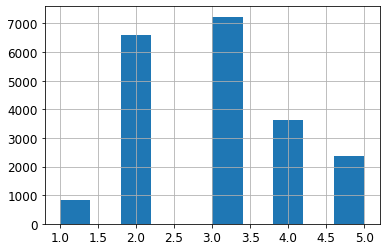

In [22]:
housing["income_cat"].hist()

소득 카테고리를 기반으로 계층 샘플링할 준비 완료

사이킷런의 StratifiedShuffleSplit 사용

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

- 테스트 세트에서 소득 카테고리의 비율

In [24]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

- 전체 데이터셋에 있는 소득 카테고리의 비율 측정

In [25]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

compare_props=pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set)
}).sort_index()

compare_props["Rand. %error"]=100*compare_props["Random"]/compare_props["Overall"]-100
compare_props["Strat. %error"]=100*compare_props["Stratified"]/compare_props["Overall"]-100

In [26]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


- 계층 샘플링을 사용해 만든 테스트 세트가 전체 데이터셋에 있는 소득 카테고리 비율과 거의 같다.
- 일반 무작위 샘플링으로 만든 테스트 세트는 비율이 많이 달라졌다.

In [27]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

## 4. 데이터 이해를 위한 탐색과 시각화

훈련 세트를 손상시키지 않기 위해 복사본을 만들어 사용

In [28]:
housing=strat_test_set.copy()

### 1. 지리적 데이터 시각화
- 지리 정보 (위도와 경도)가 있으니 모든 구역을 산점도로 만들어 데이터 시작화

그림 저장: bad_visualization_plot


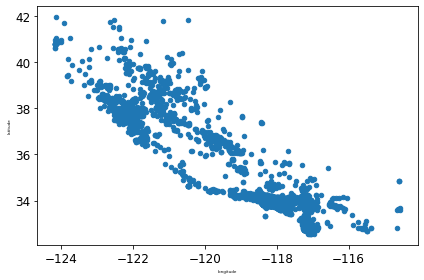

In [29]:
housing.plot(kind="scatter",x="longitude",y="latitude")
save_fig("bad_visualization_plot")

- 캘리포니아 지역을 잘 나타내지만 어떤 특별한 패턴을 찾기 어렵다 -> alpha 옵션을 0.1로 설정

그림 저장: better_visualization_plot


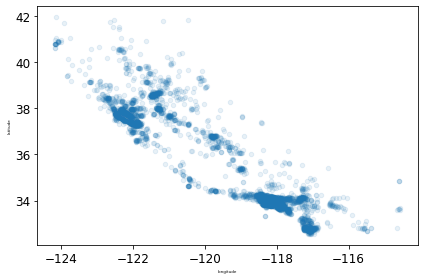

In [30]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
save_fig("better_visualization_plot")

- Bay Area, Los Angeles 근처, San Diago와 같이 밀집된 지역이 눈에 잘 띄고, Central Valley 근처를 따라 밀집된 지역이 긴 띠를 이룬다. 

이 산점도 위에 주택 가격을 나타낸다.
- 원의 반지름은 구역의 인구 (매개변수 s), 색상은 가격 (매개변수 c)
- 미리 정의된 컬러 맵 중 파란색(낮은 가격)에서 빨간색(높은 가격)까지 범위를 가지는 jet 사용 (매개변수 cmap)

그림 저장: housing_prices_scatterplot


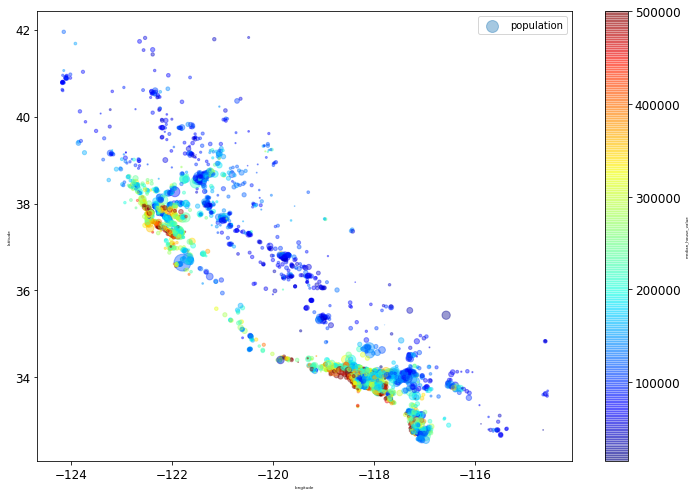

In [31]:
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,
            sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

- 주택 가격이 지역(예를 들면 바다와 인접한 곳)과 인구 밀도에 관련이 매우 크다는 사실을 알 수 있다.
- 군집 알고리즘을 이용해 주요 군집을 찾고 군집의 중심까지 거리를 재는 특성 추가 가능 -> 해안 근접성 특성이 유용할 수 있지만, 북부 캘리포니아 지역의 해안가는 주택 가격이 별로 높지 않아 규칙으로 적용되기 어렵다.

In [32]:
# Download the California image
images_path=os.path.join(PROJECT_ROOT_DIR,"images","end_to_end_project")
os.makedirs(images_path,exist_ok=True)
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename="california.png"
print("Downloading",filename)
url=DOWNLOAD_ROOT+"images/end_to_end_project/"+filename
urllib.request.urlretrieve(url,os.path.join(images_path,filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x2cc76d94c70>)

그림 저장: california_housing_prices_plot


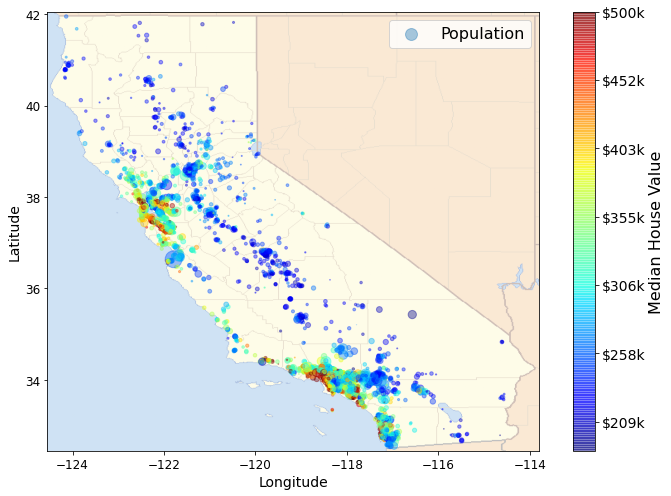

In [33]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path,filename))
ax=housing.plot(kind="scatter",x="longitude",y="latitude",figsize=(10,7),
               s=housing["population"]/100,label="Population",
               c="median_house_value",cmap=plt.get_cmap("jet"),
               colorbar=False,alpha=0.4)
plt.imshow(california_img,extent=[-124.55,-113.80,32.45,42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude",fontsize=14)
plt.xlabel("Longitude",fontsize=14)

prices=housing["median_house_value"]
tick_values=np.linspace(prices.min(),prices.max(),11)
cbar=plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values],fontsize=14)
cbar.set_label('Median House Value',fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

### 2. 상관관계 조사

1. corr() 메서드를 이용해 표준 상관계수 구하기

In [34]:
corr_matrix=housing.corr()

In [35]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

- median_house_value 는 median_income 이 올라갈 때 증가하는 경향이 있다. (양의 상관계수)
- latitude 와 median_house_value 는 약한 음의 상관계수
- 계수가 0에 가까운 것은 선형적인 상관관계가 거의 없다는 의미

2. 판다스의 scatter_matrix 함수 이용

그림 저장: scatter_matrix_plot


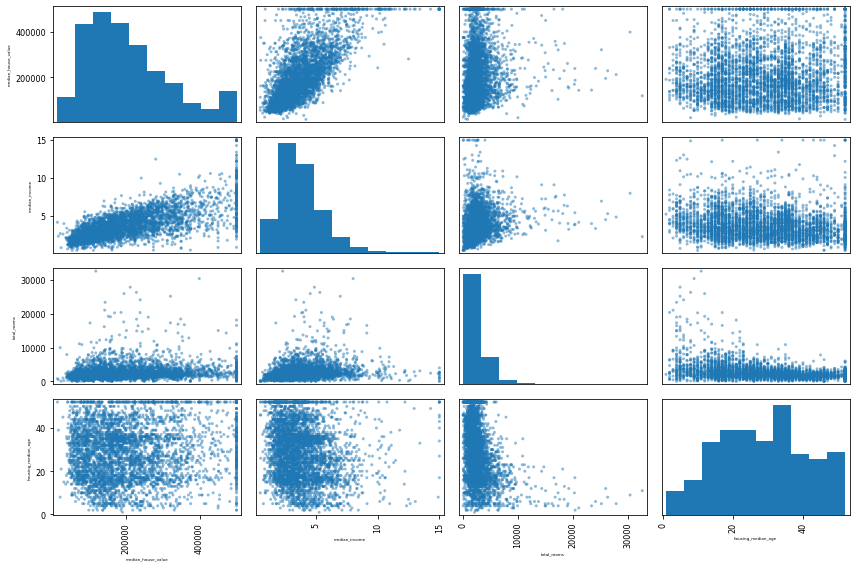

In [37]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
save_fig("scatter_matrix_plot")

median_house_value 를 예측하는데 가장 유용할 것 같은 특성은 median_income 이므로 상관관계 산점도를 확대

그림 저장: income_vs_house_value_scatterplot


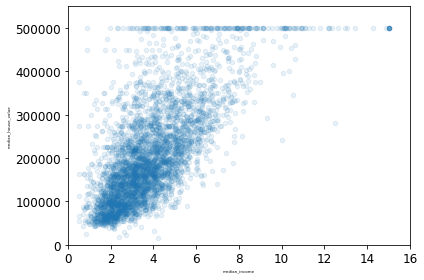

In [38]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.axis([0,16,0,550000])
save_fig("income_vs_house_value_scatterplot")

- 이 그래프가 보여주는 것
- (1) 상관관계가 매우 강하다
- (2) 앞서 본 가격 제한 값이 $500000에서 수평선으로 잘 보인다. -> 이상한 형태를 학습하지 않도록 해당 구역 제거

### 3. 특성 조합으로 실험

- 분석을 하는데 있어 더 유용한 특성으로 만들기
- 특정 구역의 방 개수 -> 가구당 방 개수
- 전체 침실 개수 -> 방 개수와 비교
- 전체 인구 -> 가구당 인구

In [39]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [40]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691831
rooms_per_household         0.192575
total_rooms                 0.131435
housing_median_age          0.071357
households                  0.071242
total_bedrooms              0.057568
population                 -0.016033
longitude                  -0.039987
population_per_household   -0.135142
latitude                   -0.150124
bedrooms_per_room          -0.240362
Name: median_house_value, dtype: float64

- total_rooms, total_bedrooms 가 더 많을수록 median_house_value 가 높아진다고 예측할 수 있다 (양의 상관관계)

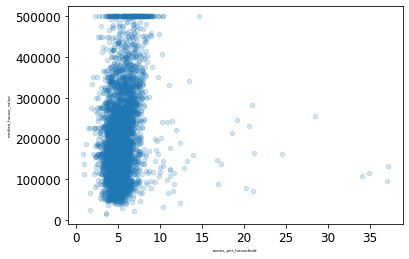

In [41]:
housing.plot(kind="scatter",x="rooms_per_household",y="median_house_value",alpha=0.2)
plt.show()

In [42]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000,4128.00000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000
mean,-119.545187,35.600998,28.585029,2687.902132,549.484187,1448.220446,509.45688,3.850998,206315.401647,5.383637,0.213684,2.967526
std,2.010260,2.127489,12.630172,2345.868226,454.414696,1197.088364,407.59254,1.879270,114170.048854,1.822611,0.060344,1.584630
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.00000,0.499900,14999.000000,0.846154,0.100000,1.089286
25%,-121.780000,33.920000,18.000000,1474.000000,301.000000,805.750000,283.00000,2.543000,118975.000000,4.434536,0.175927,2.425183
50%,-118.455000,34.220000,28.000000,2158.500000,441.000000,1172.000000,416.00000,3.514750,181300.000000,5.218776,0.203543,2.823084
75%,-117.980000,37.690000,37.000000,3171.000000,653.000000,1754.000000,613.00000,4.739700,269025.000000,6.031716,0.239756,3.286534
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.00000,15.000100,500001.000000,37.063492,1.000000,63.750000


## 5. 머신러닝 알고리즘을 위한 데이터 준비

- 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있다.
- 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축하게 된다.
- 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는데 이 함수를 사용할 수 있다.
- 여러가지 데이터 변환을 쉽게 시도해볼수도 있고, 어떤 조합이 가장 좋은지 확인하는데 편리하다.

원래 훈련 세트로 복원, 예측 변수와 타깃값에 같은 변형을 적용하지 않기 위해 예측 변수와 레이블 분리

In [43]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

### 1. 데이터 정제

In [44]:
sample_incomplete_rows=housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


옵션 #1

In [45]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


옵션 #2

In [46]:
sample_incomplete_rows.drop("total_bedrooms",axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


옵션 #3

In [47]:
median=housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median,inplace=True)

In [48]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


#### 사이킷런의 SimpleImputer 이용

In [49]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

1. 중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 삭제한다.

In [50]:
housing_num=housing.drop("ocean_proximity",axis=1)
# 다른 방법: housing_num=housing.select_dtypes(include=[np.number])

2. 각 특성의 중간값을 계산해 그 결과를 객체의 statistics_ 속성에 저장한다.

In [51]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [52]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [53]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

3. 학습된 imputer 객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꾼다.

In [54]:
X=imputer.transform(housing_num)

In [55]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [56]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [57]:
imputer.strategy

'median'

In [58]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### 2. 텍스트와 범주형 특성 다루기
- 숫자형으로 변환
- 여기서는 ocean_proximity

In [59]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


가능한 값을 제한된 개수로 나열 & 각 값은 카테고리를 나타낸다 -> 범주형 특성

#### (1) 사이킷런의 OrdinalEncoder 클래스 이용
- 순서가 있는 카테고리의 경우
- 숫자형으로 변환

In [60]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [61]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### (2) 사이킷런의 OneHotEncoder 클래스 이용
- 카테고리별 이진 특성 ; 한 특성만 1이고 나머지는 0
- 이따금 새로운 특성을 dummy 특성이라고 부른다.

In [62]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

- 출력이 사이파이 희소 행렬
- toarray() 매서드를 호출

In [63]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [64]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 3. 나만의 변환기

- fit(), transform(), fit_transform() 메서드를 구현한 파이썬 클래스 만들기
- 마지막 매서드는 TransformerMinin 을 상속하면 자동 생성
- BaseEstimator 을 상속하면 하이퍼파라미터 튜닝에 필요한 두 메서드 (get_params, set_params)를 추가로 얻게 된다.

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names="total_rooms","total_bedrooms","population","households"
rooms_ix,bedrooms_ix,population_ix,households_ix=[housing.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

DataFrame으로 복원

In [66]:
housing_extra_attribs=pd.DataFrame(
    housing_extra_attribs, columns=list(housing.columns)+['rooms_per_households','population_per_households'],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,population_per_households
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### 4. 특성 스케일링
- min-max 스케일링 ; MinMaxScaler 변환기
- 표준화 ; StandardScaler 변환기

### 5. 변환 파이프라인

- 연속된 변환을 순서대로 처리할 수 있도록 도와주는 Pipeline 클래스

- 연속된 단계를 나타내는 이름/추정기 쌍의 목록을 입력으로 받는다
- 마지막 단계에는 변환기와 추정기를 모두 사용할 수 있고, 그 외에는 모두 변환기!! -> 즉, fit_transform() 매서드 있어야 한다
- 마지막 단계에서는 fit() 매서드만 출력

(ex) 수치형 특성을 전처리하기 위한 파이프라인

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ("attribs_adder",CombinedAttributesAdder()),
    ("std_scaler",StandardScaler())
])

housing_num_tr=num_pipeline.fit_transform(housing_num)

- 파이프라인 객체는 마지막 추정기와 동일한 메서드 제공
> 이 예에서는 마지막 추정기는 변환기 StandardScaler 이므로 모든 변환을 순서대로 적용하는 transform() 메서드를 갖고 있다

In [68]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

#### ColumnTransformer
- 하나의 변환기로 각 열마다 적절한 변환을 적용해 모든 열을 처리 (수치형&범주형 모두)

In [69]:
from sklearn.compose import ColumnTransformer

num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])

housing_prepared=full_pipeline.fit_transform(housing)

In [70]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [71]:
housing_prepared.shape

(16512, 16)

(옛날 버전) DataFrameSelector 변환기 + FeatureUnion

In [72]:
from sklearn.base import BaseEstimator,TransformerMixin

class OldDataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

old_num_pipeline=Pipeline([
    ('selector',OldDataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

old_cat_pipeline=Pipeline([
    ('selector',OldDataFrameSelector(cat_attribs)),
    ('cat_encoder',OneHotEncoder(sparse=False))
])

from sklearn.pipeline import FeatureUnion

old_full_pipeline=FeatureUnion(transformer_list=[
    ("num_pipleline",old_num_pipeline),
    ("cat_pipeline",old_cat_pipeline)
])

old_housing_prepared=old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [73]:
np.allclose(housing_prepared,old_housing_prepared)

True

## 6. 모델 선택과 훈련

### 1. 훈련 세트에서 훈련하고 평가하기

#### LinearRegression

In [74]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [75]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

print("예측: ", lin_reg.predict(some_data_prepared))

예측:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [76]:
print("레이블: ", list(some_labels))

레이블:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [77]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [78]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848923

- 모델이 훈련 데이터에 과소적합된 사례 -> 더 강력한 모델을 선택 or 훈련 알고리즘에 더 좋은 특성을 주입 or 모델의 규제를 감소
- 이 모델은 규제 X

여기선 더 복잡한 모델을 시도
- DecisionTreeRegressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(random_state=42)

In [80]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

- 이 모델은 심히 과대적합

- RandomForestRegressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=100,criterion="mse",random_state=42)
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(random_state=42)

In [82]:
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18603.515021376355

### 2. 교차 검증을 사용한 평가
- k-겹 교차 검증 (k-fold cross-validation)

In [83]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                      scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [84]:
def display_scores(scores):
    print("점수: ",scores)
    print("평균: ",scores.mean())
    print("표준편차: ", scores.std())
    
display_scores(tree_rmse_scores)

점수:  [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균:  71407.68766037929
표준편차:  2439.4345041191004


In [85]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                          scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균:  69052.46136345083
표준편차:  2731.6740017983493


from sklearn.model_selection import cross_val_score

forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,
                             scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [86]:
from sklearn.svm import SVR
svm_reg=SVR(kernel="linear")
svm_reg.fit(housing_prepared,housing_labels)
housing_predictions=svm_reg.predict(housing_prepared)
svm_mse=mean_squared_error(housing_labels,housing_predictions)
svm_rmse=np.sqrt(svm_mse)
svm_rmse

111094.6308539982

## 7. 모델 세부 튜닝

### 1. 그리드 탐색
- 적은 수의 조합을 탐구할 때 유용
- 만족할만한 하이퍼파라미터 조합을 찾을 때까지 조정

GridSearchCV
- 탐색하고자 하는 하이퍼파라미터와 시도해볼 값을 지정 -> 모든 조합에 대해 교차검증을 사용해 평가

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{"bootstrap":[False],'n_estimators':[3,10],'max_features':[2,3,4]},]

forest_reg=RandomForestRegressor(random_state=42)

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

- 첫 번째 dict에 있는 n_estimators 와 max_features 하이퍼파라미터 조합인 3*4=12 를 평가
- 두 번째 dict에 있는 하이퍼 파라미터 조합인 2*3=6 을 시도
- 모두 합하면 그리드 탐색이 RandomForestRegressor 하이퍼파라미터 값의 12+6=18 개 조합을 탐색 -> 각각 다섯 번 모델을 훈련 (5-겹 교차검증)
> 전체 훈련 횟수는 18*5=90

최상의 파라미터 조합

In [89]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

최적의 추정기

In [90]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

그리드서치에서 테스트한 하이퍼파라미터 조합의 점수

In [91]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

- 여기서 max_features=8, n_estimator=30 일 때 최적의 솔루션임을 알 수 있다.

In [92]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.145027,0.023894,0.007563,0.000823,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.495908,0.032116,0.021559,0.000805,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,1.539325,0.019846,0.059445,0.000498,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.253311,0.011635,0.007990,0.000652,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.803488,0.014863,0.020750,0.000737,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,2.416796,0.019013,0.060010,0.002470,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.324740,0.010230,0.008170,0.000965,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,1.081747,0.029401,0.020937,0.000631,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,3.254198,0.023304,0.061024,0.001590,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.409118,0.005549,0.007396,0.000507,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


### 2. 랜덤 탐색
- 가능한 모든 조합을 시도하는 대신 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={'n_estimators':randint(low=1,high=200),
               'max_features':randint(low=1,high=8),}

forest_reg=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_distribs,
                              n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=42)
rnd_search.fit(housing_prepared,housing_labels)

cvres=rnd_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

### 3. 앙상블 방법

### 4. 최상의 모델과 오차 분석

- 최상의 모델을 분석하면 문제에 대한 좋은 통찰을 얻는 경우가 많다.

(ex) RandomForestRegressor 가 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도를 알려준다.

In [95]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [96]:
extra_attribs=["rooms_per_hhold","pop_per_hholds","bedrooms_per_room"]
cat_encoder=full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hholds'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

- 이 정보를 바탕으로 덜 중요한 특성을 제외할 수 있다. (ex) ocean_proximity 카테괴 중 하나만 실제로 유용하므로 다른 카테고리는 제외

### 5. 테스트 세트로 시스템 평가하기

- 테스트 세트에서 최종 모델 평가

In [99]:
final_model=grid_search.best_estimator_
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()

X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)

final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [100]:
final_rmse

47730.22690385927

- 테스트 rmse에 대한 95% 신뢰구간

In [103]:
from scipy import stats

confidence=0.95
squared_errors=(final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_error)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

(수동으로 계산)

In [104]:
m=len(squared_errors)
mean=squared_errors.mean()
tscore=stats.t.ppf((1+confidence)/2,df=m-1)
tmargin=tscore+squared_errors.std(ddof=1)/np.sqrt(m)
np.sqrt(mean-tmargin),np.sqrt(mean+tmargin)

(46698.27645177006, 48740.333370031585)

In [106]:
zscore=stats.norm.ppf((1+confidence)/2)
zmargin=zscore*squared_errors.std(ddof=1)/np.sqrt(m)
np.sqrt(mean-zmargin),np.sqrt(mean+zmargin)

(45685.717918136455, 49690.68623889413)

## 8. 론칭, 모니터링, 시스템 보수

## 추가 내용

### 1. 전처리와 예측을 포함한 전체 파이프라인

In [107]:
full_pipeline_with_predictor=Pipeline([
    ("preparation",full_pipeline),
    ("linear",LinearRegression())
])

full_pipeline_with_predictor.fit(housing,housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

### 2. joblib를 사용한 모델 저장

In [109]:
my_model=full_pipeline_with_predictor

In [110]:
import joblib
joblib.dump(my_model,"my_model.pkl")
my_model_loaded=joblib.load("my_model.pkl")

### 3. RandomizedSearchCV 를 위한 Scipy 분포 함수

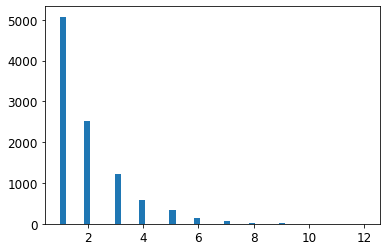

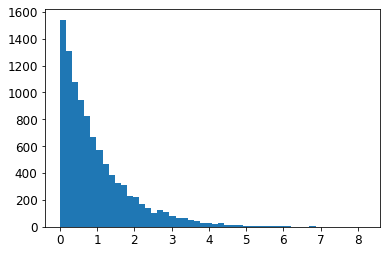

In [112]:
from scipy.stats import geom,expon
geom_distrib=geom(0.5).rvs(10000,random_state=42)
expon_distrib=expon(scale=1).rvs(10000,random_state=42)
plt.hist(geom_distrib,bins=50)
plt.show()
plt.hist(expon_distrib,bins=50)
plt.show()

## 10. 연습문제

### 1.

In [113]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'kernel':['linear'],'C':[10.,30.,100.,300.,1000.,3000.,10000.,30000.0]},
    {'kernel':['rbf'],'C':[1.0,3.0,10.,30.,100.,300.,10000.0]},
]

svm_reg=SVR()
grid_search=GridSearchCV(svm_reg,param_grid,cv=5,scoring="neg_mean_squared_error",verbose=2)
grid_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   6.7s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   6.5s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   6.3s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   6.5s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   6.5s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   6.4s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   6.4s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   6.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[CV] ............................... C=30.0, kernel=rbf, total=  10.1s
[CV] C=100.0, kernel=rbf .............................................
[CV] .............................. C=100.0, kernel=rbf, total=  10.0s
[CV] C=100.0, kernel=rbf .............................................
[CV] .............................. C=100.0, kernel=rbf, total=  10.1s
[CV] C=100.0, kernel=rbf .............................................
[CV] .............................. C=100.0, kernel=rbf, total=  10.1s
[CV] C=100.0, kernel=rbf .............................................
[CV] .............................. C=100.0, kernel=rbf, total=  10.0s
[CV] C=100.0, kernel=rbf .............................................
[CV] .............................. C=100.0, kernel=rbf, total=  10.0s
[CV] C=300.0, kernel=rbf .............................................
[CV] .............................. C=300.0, kernel=rbf, total=   9.8s
[CV] C=300.0, kernel=rbf .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 11.5min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 10000.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [114]:
negative_mse=grid_search.best_score_
rmse=np.sqrt(-negative_mse)
rmse

61326.13701022281

In [115]:
grid_search.best_params_

{'C': 10000.0, 'kernel': 'rbf'}

- 선형 커널이 RBF 커널보다 성능이 더 나은 것 같다.

### 2.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs={
    'kernel':['linear','rbf'],
    'C':reciprocal(20,200000),
    'gamma':expon(scale=1.0),
}

svm_reg=SVR()
rnd_search=RandomizedSearchCV(svm_reg,param_distributions=param_distribs,
                             n_iter=50, cv=5,scoring="neg_mean_squared_error",
                             verbose=2,random_state=42)
rnd_search.fit(housing_prepared,housing_labels)

negative_mse=rnd_search.best_score_
rmse=np.sqrt(-negative_mse)
rmse

-RandomForestRegressor 성능에 훨씬 가까워졌지만 여전히 차이가 있음

최상의 하이퍼파라미터 확인

rnd_search.best_params_

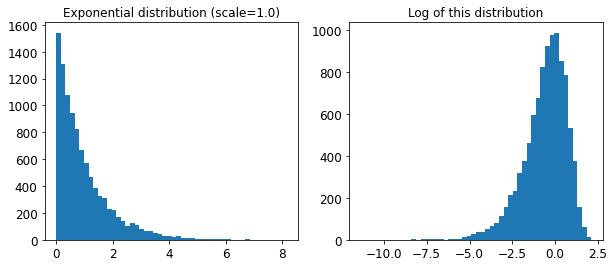

In [125]:
expon_distrib=expon(scale=1.)
samples=expon_distrib.rvs(10000,random_state=42)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples,bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples),bins=50)
plt.show()

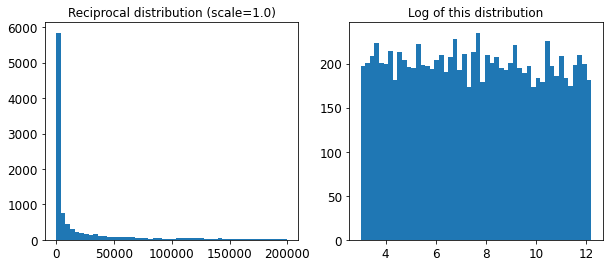

In [126]:
reciprocal_distrib=reciprocal(20,200000)
samples=reciprocal_distrib.rvs(10000,random_state=42)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples,bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples),bins=50)
plt.show()

### 3.

In [137]:
from sklearn.base import BaseEstimator,TransformerMixin

def indices_of_top_k(arr,k):
    return np.sort(np.argpartition(np.array(arr),-k)[-k:])
class TopFeatureSelector(BaseEstimator,TransformerMixin):
    def __init__(self, feature_importances,k):
        self.feature_importances=feature_importances
        self.k=k
    def fit(self,X,y=None):
        self.feature_indices_=indices_of_top_k(self.feature_importances,self.k)
        return self
    def transform(self,X):
        return X[:,self.feature_indices_]

In [138]:
k=5

In [139]:
top_k_feature_indices=indices_of_top_k(feature_importances,k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12], dtype=int64)

In [140]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hholds',
       'INLAND'], dtype='<U18')

In [141]:
sorted(zip(feature_importances,attributes),reverse=True)[:k]

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hholds'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude')]

In [142]:
preparation_and_feature_selection_pipeline=Pipeline([
    ('preparation',full_pipeline),
    ('feature_selection',TopFeatureSelector(feature_importances,k))
])

In [143]:
housing_prepared_top_k_features=preparation_and_feature_selection_pipeline.fit_transform(housing)

In [144]:
housing_prepared_top_k_features[:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [145]:
housing_prepared[0:3,top_k_feature_indices]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

### 4.

prepare_select_and_predict_pipeline=Pipeline([
    ('preparation',full_pipeline),
    ('feature_selection',TopFeatureSelector(feature_importances,k)),
    ('svm_reg',SVR(**rnd_search.best_params_))
])

prepare_select_and_predict_pipeline.fit(housing,housing_labels)

some_data=housing.iloc[:4]
some_labels=housing_labels.iloc[:4]

print("Predictions:\t",prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t",list(some_labels))

### 5.

In [ ]:
param_grid=[{
    'preparation__num__imputer__strategy':['mean','median','most_frequent'],
    'feature_selection__k':list(range(1,len(feature_importance)+1))
}]

grid_search_prep=GridSearchCV(prepare_select_and_predict_pipeline,param_grid,cv=5,
                             scoring='neg_mean_squared_error',verbose=2)
grid_search_prep.fit(housing,housing_labels)

In [ ]:
grid_search_prep.best_params_